# Inspecting Data

In [1]:
# Import necessary library
import pandas as pd

# Load the dataset
file_path = "./original_data/product_sales_monthly.csv"

# Read CSV file with appropriate encoding (ISO-8859-1 handles special characters)
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9252 entries, 0 to 9251
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  9252 non-null   object 
 1   Product Name         9252 non-null   object 
 2   Sales                9252 non-null   float64
dtypes: float64(1), object(2)
memory usage: 217.0+ KB


In [2]:
# Preview the first 10 rows
df.head(10)

,Month of Order Date,Product Name,Sales
0,2013-05-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",208.0
1,2015-06-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",208.0
2,2013-11-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",333.0
3,2016-07-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",416.0
4,2016-11-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",500.0
5,2015-08-01,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",1041.0
6,2013-11-01,1/4 Fold Party Design Invitations & White Enve...,6.0
7,2014-11-01,1/4 Fold Party Design Invitations & White Enve...,44.0
8,2014-12-01,3-ring staple pack,4.0
9,2013-01-01,3-ring staple pack,6.0


In [3]:
# Preview the last 10 rows
df.tail(10)

,Month of Order Date,Product Name,Sales
9242,2015-07-01,Zipper Ring Binder Pockets,2.0
9243,2015-12-01,Zipper Ring Binder Pockets,3.0
9244,2016-01-01,Zipper Ring Binder Pockets,3.0
9245,2015-11-01,Zipper Ring Binder Pockets,4.0
9246,2014-11-01,Zipper Ring Binder Pockets,6.0
9247,2016-06-01,Zipper Ring Binder Pockets,6.0
9248,2016-07-01,Zipper Ring Binder Pockets,10.0
9249,2013-04-01,Zipper Ring Binder Pockets,14.0
9250,2016-12-01,Zipper Ring Binder Pockets,15.0
9251,2013-07-01,Zipper Ring Binder Pockets,16.0


In [4]:
# Generate summary statistics for numerical columns
df.describe()

,Sales
count,9252.000000
mean,248.308798
std,669.441779
min,0.000000
25%,18.000000
50%,60.000000
75%,222.000000
max,22638.000000


In [5]:
#summary of info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9252 entries, 0 to 9251
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  9252 non-null   object 
 1   Product Name         9252 non-null   object 
 2   Sales                9252 non-null   float64
dtypes: float64(1), object(2)
memory usage: 217.0+ KB


In [6]:
# Count occurrences of each unique product in the dataset
product_counts = df["Product Name"].value_counts(dropna=False)

# Display the value counts
product_counts

Product Name
Easy-staple paper                                       32
Staple envelope                                         30
Staples                                                 30
Staples in misc. colors                                 18
Situations Contoured Folding Chairs, 4/Set              14
                                                        ..
Xerox 1984                                               1
4009 Highlighters                                        1
Zebra GK420t Direct Thermal/Thermal Transfer Printer     1
Xiaomi Mi3                                               1
Xerox WorkCentre 6505DN Laser Multifunction Printer      1
Name: count, Length: 1850, dtype: int64

## Data Inspection Summary
- Data Quality: No missing values across 9,252 records, ensuring reliable analysis.
- Sales Insights: Highly skewed distribution (mean = 248, max = 22,638), suggesting a few high-value transactions drive revenue.
- Product Distribution: 1,850 unique products, but sales are concentrated in a few key items (Easy-Staple Paper, Staple Envelope), indicating potential for demand forecasting.
## Key Takeaways on Initial Inspection:
- Sales outliers may disproportionately impact revenue—further analysis needed to understand customer behavior.
- A small subset of products drive most sales, highlighting opportunities for inventory optimization and strategic marketing.
- Further exploration should focus on identifying sales trends and patterns to inform business decisions.

# Aggregating Data

In [7]:
# Extract the year from 'Month of Order Date' (assuming format is YYYY-MM or similar)
df["Year"] = df["Month of Order Date"].str[:4]

# df["Year"]

In [8]:
# Group by Year and compute summary statistics
yearly_summary = df.groupby("Year").describe()

# Reset index and rename columns for clarity
yearly_summary = yearly_summary.reset_index().rename(columns={"Month of Order Date": "Year"})

# Display yearly summary statistics
yearly_summary

Year   Sales                                                          
          count        mean         std  min   25%   50%     75%      max
0  2013  1875.0  258.267200  803.537374  1.0  17.0  55.0  224.00  22638.0
1  2014  1968.0  239.107215  521.330289  1.0  19.0  62.0  225.25   7312.0
2  2015  2400.0  253.550833  711.795040  1.0  19.0  58.5  222.00  17500.0
3  2016  3009.0  243.940512  627.741547  0.0  18.0  60.0  221.00  14000.0

In [9]:
# Aggregate sales by year and product
yearly_product_sales = df.groupby(["Year", "Product Name"]).sum(numeric_only=True).reset_index()

# Aggregate sales by product (ignoring year)
total_product_sales = df.groupby("Product Name").sum(numeric_only=True).reset_index()

# Display results
yearly_product_sales, total_product_sales

(      Year                                       Product Name  Sales
 0     2013         #10 White Business Envelopes,4 1/8 x 9 1/2  156.0
 1     2013            #10- 4 1/8" x 9 1/2" Recycled Envelopes   63.0
 2     2013       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes   23.0
 3     2013  1.7 Cubic Foot Compact "Cube" Office Refrigera...  541.0
 4     2013  1/4 Fold Party Design Invitations & White Enve...    6.0
 ...    ...                                                ...    ...
 5321  2016  iKross Bluetooth Portable Keyboard + Cell Phon...   67.0
 5322  2016                         iOttie HLCRIO102 Car Mount  120.0
 5323  2016                                iOttie XL Car Mount  224.0
 5324  2016  invisibleSHIELD by ZAGG Smudge-Free Screen Pro...  205.0
 5325  2016                 netTALK DUO VoIP Telephone Service  168.0
 
 [5326 rows x 3 columns],
                                            Product Name   Sales
 0     "While you Were Out" Message Book, One Form pe...    25.0
 1

## Data Aggregation Insights
- Annual Sales Trends: Sales peaked in 2015, followed by a decline in 2016, indicating potential market shifts or operational changes.
- Sales Distribution: Median annual sales remained relatively stable, but high variance suggests that large transactions significantly impact total revenue.
- Product-Level Sales: A small subset of products consistently drive high sales, reinforcing the Pareto principle (80/20 rule) in product demand.
## Key Takeaways on Data Aggregation:
- Investigate factors behind the 2016 sales decline.
- Identify top-performing products and assess opportunities for cross-selling or bundling.
- Analyze customer segments driving high-value transactions to refine sales strategies.

# Visualizing Results
This notebook explores product sales trends through three key visualizations:
- Monthly Sales Trend: A line chart tracking total sales over time to identify growth patterns and fluctuations.
- Sales Distribution: A histogram displaying the frequency distribution of sales amounts to understand variability and common sales ranges.
- Top-Selling Products: A horizontal bar chart ranking the highest-grossing products to highlight key revenue drivers.

In [10]:
# Import necessary library
import matplotlib.pyplot as plt

# Ensure 'Month of Order Date' is treated as a string for extraction
df["Year-Month"] = df["Month of Order Date"].astype(str)

# Aggregate sales by Month
monthly_sales = df.groupby("Year-Month").sum(numeric_only=True)

#monthly_sales

<Figure size 1000x500 with 0 Axes>

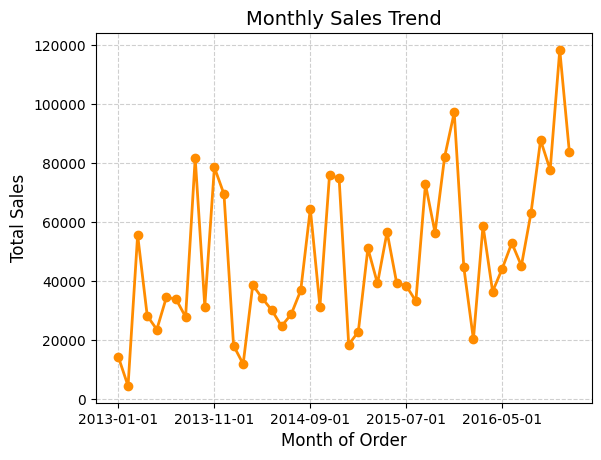

In [11]:
# Plot Monthly Sales Trend (Line Plot)
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind="line", marker="o", color="darkorange", linewidth=2, markersize=6, legend=False)
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month of Order", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

<Figure size 800x500 with 0 Axes>

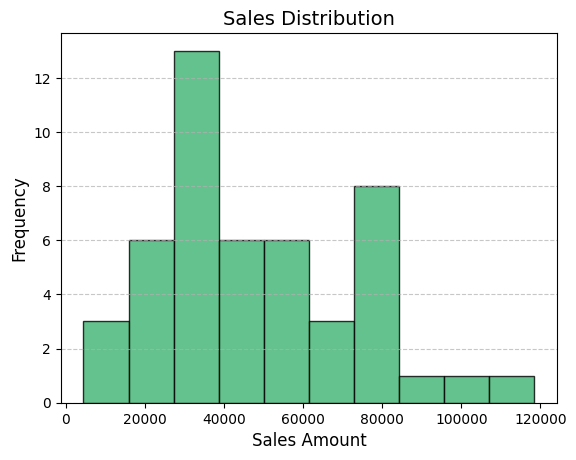

In [12]:
# Histogram of Sales Distribution
plt.figure(figsize=(8, 5))
monthly_sales.plot(kind="hist", bins=10, color="mediumseagreen", alpha=0.8, edgecolor="black", legend=False)
plt.title("Sales Distribution", fontsize=14)
plt.xlabel("Sales Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [13]:
# Aggregate sales by Product and sort by highest sales
top_products = df.groupby("Product Name").sum(numeric_only=True).sort_values(by="Sales", ascending=False).head(10)

top_products

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61600.0
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27454.0
Cisco TelePresence System EX90 Videoconferencing Unit,22638.0
HON 5400 Series Task Chairs for Big and Tall,21870.0
GBC DocuBind TL300 Electric Binding System,19823.0
GBC Ibimaster 500 Manual ProClick Binding System,19026.0
Hewlett Packard LaserJet 3310 Copier,18840.0
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18375.0
GBC DocuBind P400 Electric Binding System,17965.0


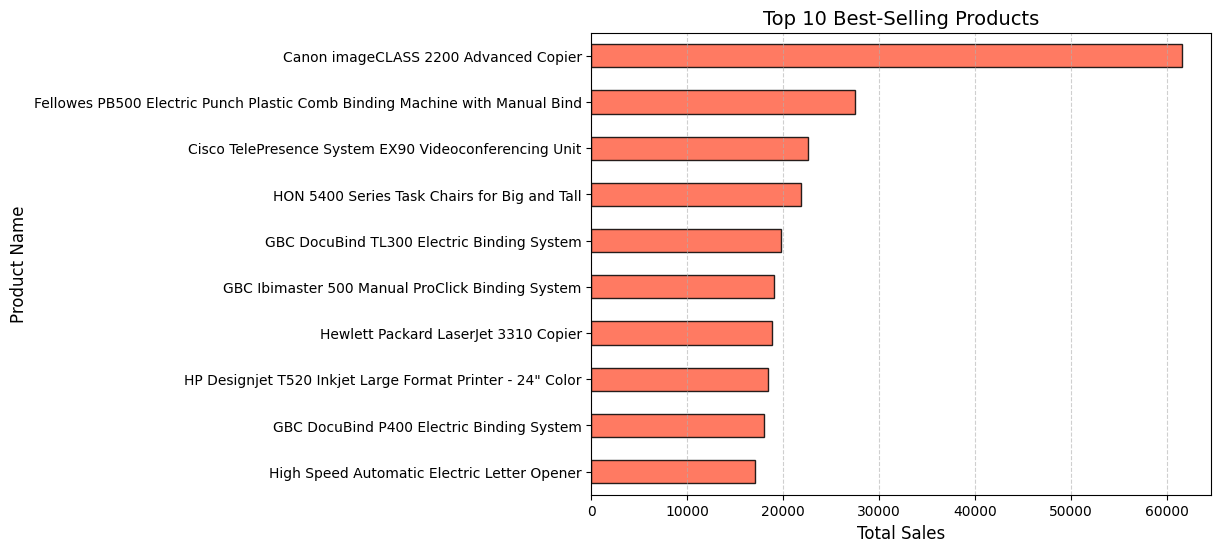

In [14]:
# Plot Top 10 Products by Sales (Horizontal Bar Chart)
plt.figure(figsize=(8, 6))
top_products["Sales"].plot(kind="barh", color="tomato", edgecolor="black", alpha=0.85)
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.gca().invert_yaxis()  # Ensure highest sales appear on top
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

## Visual Sales Performance Analysis
- Revenue Trends: Sales show an upward trajectory with periodic spikes. Fluctuations suggest seasonal demand or external factors.
Sales Distribution: Majority of transactions fall within the 20K–80K range, with high-value outliers contributing significantly to total revenue.
- Top Products: Canon imageCLASS 2200 Advanced Copier leads sales, with strong demand for office equipment. Sales are concentrated among a few key products.

## Visual Sales Recommendations:
- Analyze peak sales periods for marketing and inventory optimization.
- Identify opportunities to boost mid-range sales volume.
- Maintain focus on top-performing products to sustain revenue growth.

# Final Analysis & Strategic Recommendations
- Sales Trends: Revenue follows a cyclical pattern with peaks likely tied to seasonality or promotions. Heavy reliance on large transactions creates revenue volatility, highlighting the need for a more balanced sales strategy.
- Product Performance: A small subset of products dominates sales, with office equipment leading—indicating a strong B2B market focus. This concentration suggests opportunities for targeted expansion and risk mitigation.

# Actionable Strategy:
- Revenue Stability: Shift reliance away from high-value transactions by driving more consistent mid-range sales.
- Market Optimization: Strengthen inventory planning and targeted marketing for top-performing products.
- Sales Expansion: Analyze declining trends and leverage demand forecasting to refine growth strategies.